In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
# import and concat dataframes
crypto = pd.read_csv('file/crypto.csv')
stock = pd.read_csv('file/stockmarket.csv')

In [3]:
crypto = crypto[['subreddit','title']]
stock = stock[['subreddit','title']]

In [4]:
frames = [crypto,stock]
df = pd.concat(frames)

In [5]:
# Make Cryptocurrency label as 1, stockmarket label as 0
df['subreddit'] = [1 if i == 'CryptoCurrency' else 0 for i in df['subreddit']]

In [6]:
# X and y
X = df['title']
y = df['subreddit']

# Baseline accuracy
y.value_counts(normalize=True)

0    0.5
1    0.5
Name: subreddit, dtype: float64

In [7]:
# Split the data into the training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    random_state=42)

## Pipeline and Gridsearch

### Random Forest and Extra Tree

In [8]:
# Set a pipeline with two stages:
# transform with countvectorizer
# estimate with random forest
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('rf', RandomForestClassifier())
])

# gridsearch with random forest
# parameters for rf
rf_params = {
    'rf__n_estimators': [100,150,200],
    'rf__max_depth': [None, 1,2,3,4,5]
}

gs_rf = GridSearchCV(pipe, param_grid= rf_params, cv= 5)
gs_rf.fit(X_train,y_train)
print(gs_rf.best_score_)
gs_rf.best_params_

0.8013333333333333


{'rf__max_depth': None, 'rf__n_estimators': 200}

In [9]:
gs_rf.score(X_train,y_train),gs_rf.score(X_test,y_test)

(0.9986666666666667, 0.828)

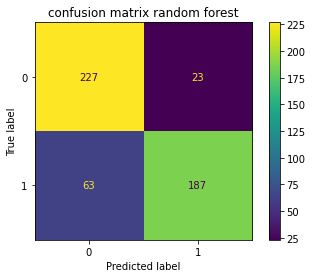

In [10]:
plot_confusion_matrix(gs_rf, X_test,y_test)
plt.title('confusion matrix random forest')
plt.savefig('picture/confusion_matrix_rf.png');

In [44]:
# Classification report
y_preds_rf = gs_rf.predict(X_test)
report_rf = classification_report(y_test, y_preds_rf,output_dict=True)
print(classification_report(y_test, y_preds_rf))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       250
           1       0.89      0.75      0.81       250

    accuracy                           0.83       500
   macro avg       0.84      0.83      0.83       500
weighted avg       0.84      0.83      0.83       500



In [41]:
dict_rf = pd.DataFrame(report_rf)
dict_rf.to_csv('EDA/classification_report_rf.csv')

In [12]:
# estimate with extra tree
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('et', ExtraTreesClassifier())
])

# gridsearch with extra trees
# parameters for et
et_params = {
    'et__n_estimators': [100,150,200],
    'et__max_depth': [None, 1,2,3,4,5]
}

gs_et = GridSearchCV(pipe, param_grid= et_params, cv= 5)
gs_et.fit(X_train,y_train)
print(gs_et.best_score_)
gs_et.best_params_

0.7986666666666666


{'et__max_depth': None, 'et__n_estimators': 200}

In [13]:
gs_et.score(X_train,y_train),gs_et.score(X_test,y_test)

(0.9986666666666667, 0.838)

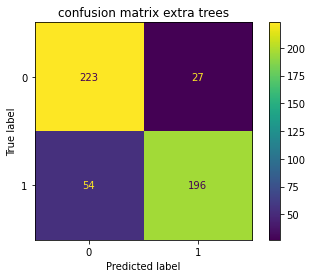

In [14]:
plot_confusion_matrix(gs_et, X_test,y_test)
plt.title('confusion matrix extra trees')
plt.savefig('picture/confusion_matrix_et.png');

In [43]:
# Classification report
y_preds_et = gs_et.predict(X_test)
report_et = classification_report(y_test, y_preds_et,output_dict=True)
print(classification_report(y_test, y_preds_et))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       250
           1       0.88      0.78      0.83       250

    accuracy                           0.84       500
   macro avg       0.84      0.84      0.84       500
weighted avg       0.84      0.84      0.84       500



In [39]:
dict_et = pd.DataFrame(report_et)
dict_et.to_csv('EDA/classification_report_et.csv')

### SVM

In [21]:
# estimate with SVM
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('svc', SVC())
])

# gridsearch with SVC
# parameters for svc
svc_params = {
    'svc__C': np.linspace(1,5,20),
    'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'svc__degree': [2,3,4,5]
}

gs_svc = GridSearchCV(pipe, param_grid= svc_params, cv= 5)
gs_svc.fit(X_train,y_train)
print(gs_svc.best_score_)
gs_svc.best_params_

0.8059999999999998


{'svc__C': 1.631578947368421, 'svc__degree': 2, 'svc__kernel': 'rbf'}

In [22]:
gs_svc.score(X_train,y_train),gs_svc.score(X_test,y_test)

(0.976, 0.822)

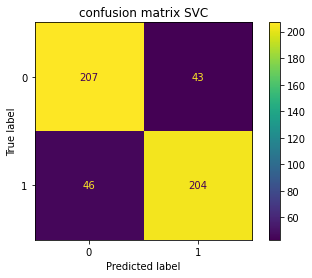

In [23]:
plot_confusion_matrix(gs_svc, X_test,y_test)
plt.title('confusion matrix SVC')
plt.savefig('picture/confusion_matrix_svc.png');

In [42]:
# Classification report
y_preds_svc = gs_svc.predict(X_test)
report_svc = classification_report(y_test, y_preds_svc,output_dict=True)
print(classification_report(y_test, y_preds_svc))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82       250
           1       0.83      0.82      0.82       250

    accuracy                           0.82       500
   macro avg       0.82      0.82      0.82       500
weighted avg       0.82      0.82      0.82       500



In [37]:
dict_svc = pd.DataFrame(report_svc)
dict_svc.to_csv('EDA/classification_report_svc.csv')